In [1]:
pip install folium matplotlib mapclassify geoplot geopandas osmnx folium matplotlib mapclassify geopy netgraph ipyleaflet streamlit streamlit_folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.3/339.3 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6

In [2]:
import re
import pandas as pd
import numpy as np
import bs4
import requests
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from IPython import display
import networkx.algorithms.approximation as nx_app
import math
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline
from netgraph import Graph
from matplotlib.animation import FuncAnimation
from IPython import display
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, LineString
import geoplot
import ipyleaflet
from ipyleaflet import Map, Marker
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim
import streamlit as st
from geopy.geocoders import Nominatim
import folium
from streamlit_folium import st_folium
from pandas import read_excel

2025-07-01 06:11:08.546 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [3]:
my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'Tee.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df) # shows headers with top 5 rows

                       Tea  Theanine (mg in 1g tea)  Caffeine (mg in 1 g tea)  \
0             Matcha Basic                    10.00                     20.00   
1        Matcha Ceremonial                    20.00                     20.00   
2                   Sencha                     2.92                     11.32   
3                   Pu Erh                     0.01                     30.00   
4                Gunpowder                     3.83                     13.07   
5                   Oolong                     6.00                     20.00   
6                Earl grey                     2.70                     16.48   
7   Darjeeling First Flush                     4.25                     14.10   
8                    Assam                     5.69                     19.93   
9                   Ceylon                     4.33                     14.61   
10              Pai Mu Tan                     1.30                      4.00   
11                 Chun Me  

In [4]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.set_index("Tea",drop=True,inplace=True)

In [9]:
# sort by Theanine content descending
df = df.sort_values('Theanine (mg in 1g tea)', ascending=False)

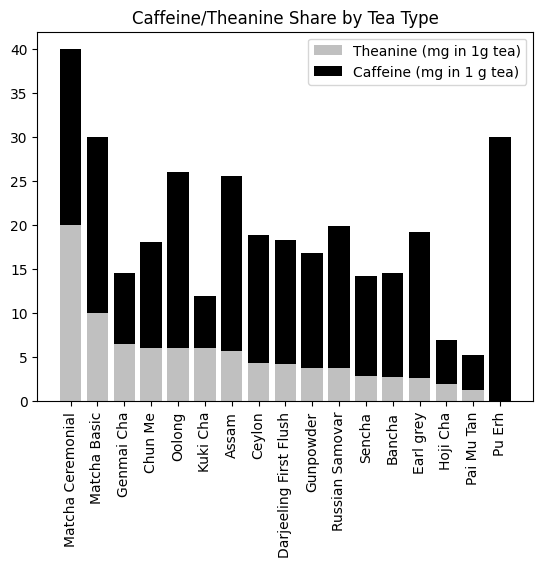

In [10]:
fig, ax = plt.subplots()

# First plot the 'Theanine (mg in 1g tea)' bars for every Tea
ax.bar(df.index, df['Theanine (mg in 1g tea)'], label='Theanine (mg in 1g tea)',color='#C0C0C0')

ax.bar(df.index, df['Caffeine (mg in 1 g tea)'], bottom=df['Theanine (mg in 1g tea)'],
       label='Caffeine (mg in 1 g tea)',color='#000000')

ax.set_title('Caffeine/Theanine Share by Tea Type')

ax.tick_params(axis='x', labelrotation=90)

ax.legend()

In [12]:
# sort by Caffeine content descending
df = df.sort_values('Caffeine (mg in 1 g tea)', ascending=False)

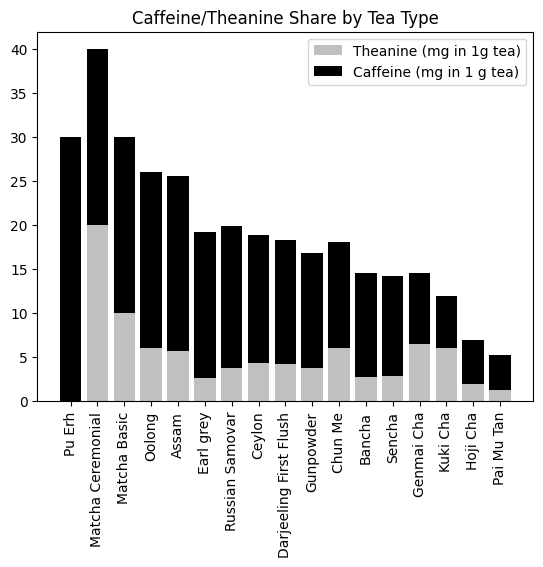

In [13]:
fig, ax = plt.subplots()

# First plot the 'Theanine (mg in 1g tea)' bars for every Tea
ax.bar(df.index, df['Theanine (mg in 1g tea)'], label='Theanine (mg in 1g tea)',color='#C0C0C0')

ax.bar(df.index, df['Caffeine (mg in 1 g tea)'], bottom=df['Theanine (mg in 1g tea)'],
       label='Caffeine (mg in 1 g tea)',color='#000000')

ax.set_title('Caffeine/Theanine Share by Tea Type')

ax.tick_params(axis='x', labelrotation=90)

ax.legend()